In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# We have basically imported this so that we can also check out the manual way of determining p,d,q values for ARIMA.

In [5]:
from pmdarima import auto_arima

In [6]:
df1 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\DailyFemaleBirths.csv", index_col=0, parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [7]:
# df2 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\", index_col=0, parse_dates=True)

### ARMA model:

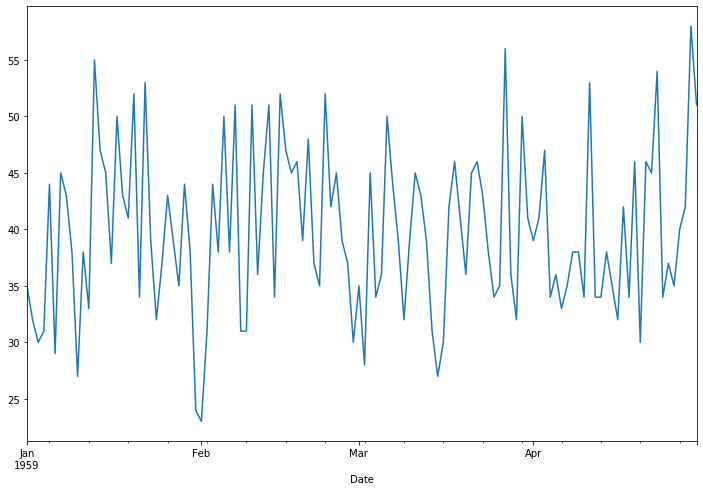

In [8]:
df1['Births'].plot(figsize=(12,8))

##### Lets check for Stationarity

In [9]:
# Lets use our created function to get the analysis out of adfuller test:

from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    '''
    Pass in a time series and an optional title, function returns an ADF report
    '''
    print(f'Augmented Dickey-fuller test: {title}')
    result = adfuller(series.dropna(), autolag='AIC') # dropna() handles differenced data
    
    labels = ['adf test stats','p-value', '# of lags', '# of observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key,val in result[4].items():
        out[f'critical value ({key})'] = val
    
    print(out.to_string())
    
    if result[1] <= 0.05:
        print("Null Hypothesis rejected! Time series is stationary!")
    else:
        print("Failed to reject Null Hypothesis! Time Series is not stationary!")

In [10]:
adf_test(df1['Births'])

Augmented Dickey-fuller test: 
adf test stats         -9.855384e+00
p-value                 4.373545e-17
# of lags               0.000000e+00
# of observations       1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Null Hypothesis rejected! Time series is stationary!


In [11]:
## This confirms that our time series is Stationary.
## It means ARMA model should work for this!

In [12]:
auto_arima(df1['Births'],start_p=2,max_p=6, start_q=2, max_q=6, seasonal=False, trace = True, stepwise=False, suppress_warnings=True,).summary()

Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=823.489, BIC=829.064, Time=0.014 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=824.747, BIC=833.110, Time=0.092 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=826.057, BIC=837.207, Time=0.128 seconds
Fit ARIMA: (0, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=828.050, BIC=841.987, Time=0.139 seconds
Fit ARIMA: (0, 0, 4)x(0, 0, 0, 0) (constant=True); AIC=829.793, BIC=846.518, Time=0.248 seconds
Fit ARIMA: (0, 0, 5)x(0, 0, 0, 0) (constant=True); AIC=831.518, BIC=851.030, Time=0.284 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=824.647, BIC=833.010, Time=0.048 seconds
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=826.399, BIC=837.549, Time=0.282 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=828.062, BIC=841.999, Time=0.148 seconds
Fit ARIMA: (1, 0, 3)x(0, 0, 0, 0) (constant=True); AIC=830.057, BIC=846.782, Time=0.220 seconds
Fit ARIMA: (1, 0, 4)x(0, 0, 0, 0) (const

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Wed, 19 Feb 2020   AIC                            823.489
Time:                        19:16:58   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# ## Trying using statsmodels:

# import statsmodels.api as sm
# resDiff = sm.tsa.arma_order_select_ic(df1['Births'], max_ar=4, max_ma=4, ic='aic', trend='c')

In [14]:
# print('ARMA(p,q) =',resDiff['aic_min_order'],'is the best.')

### Seems like, something went wrong while identifying the values of p and q for ARMA model.!!
### Performed different perm and comb and considering (p,q) = (1,0) having best AIC until further investigation.!

In [15]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [16]:
train['Births']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-03-27    56
1959-03-28    36
1959-03-29    32
1959-03-30    50
1959-03-31    41
Freq: D, Name: Births, Length: 90, dtype: int64

In [17]:
model = ARMA(train['Births'], order=(1,0))

In [18]:
results = model.fit()

In [19]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(1, 0)   Log Likelihood                -308.054
Method:                       css-mle   S.D. of innovations              7.417
Date:                Wed, 19 Feb 2020   AIC                            622.107
Time:                        19:16:58   BIC                            629.607
Sample:                    01-01-1959   HQIC                           625.132
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7630      0.853     46.597      0.000      38.091      41.436
ar.L1.Births     0.0847      0.105      0.809      0.419      -0.121       0.290
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           11.8103           +0.0000j           11.8103            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
start=len(train)
end= len(train) + len(test) - 1
start,end

(90, 119)

In [21]:
predictions = results.predict(start, end).rename('ARMA(2,2) preds')

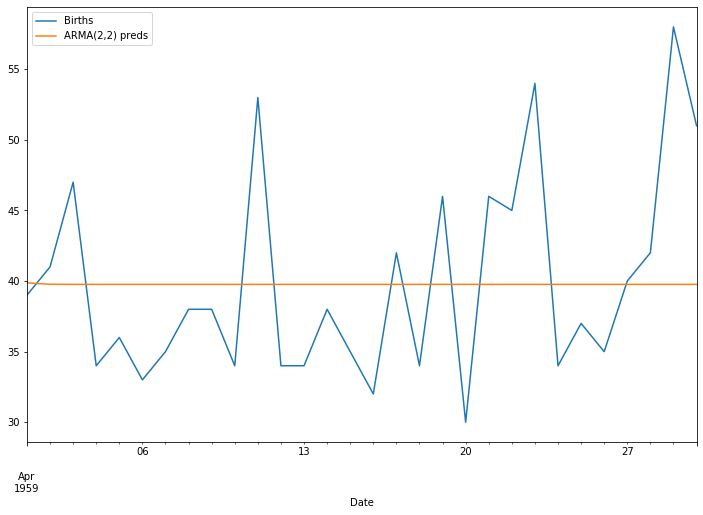

In [22]:
test.plot(figsize=(12,8),legend = True)
predictions.plot(legend = True)

In [23]:
test.mean()

Births    39.833333
dtype: float64

In [24]:
predictions.mean()

39.76685659374244

## ARIMA modelling:

In [108]:
# Lets look into full ARIMA model now!

In [109]:
df2 = pd.read_csv("C:\\Users\\shaleens\\Desktop\\Projects\\TimeSeriesUdacity\\TS Udemy Vids\\Time Series 2\\Trade Inventories.csv", parse_dates=True, index_col=0)

In [110]:
df2.head(13)

,Inventory
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
1997-06-01,1334688
1997-07-01,1342310
1997-08-01,1348243
1997-09-01,1355839


In [111]:
df2 = df2.iloc[:264]
df2.index.freq= "MS"

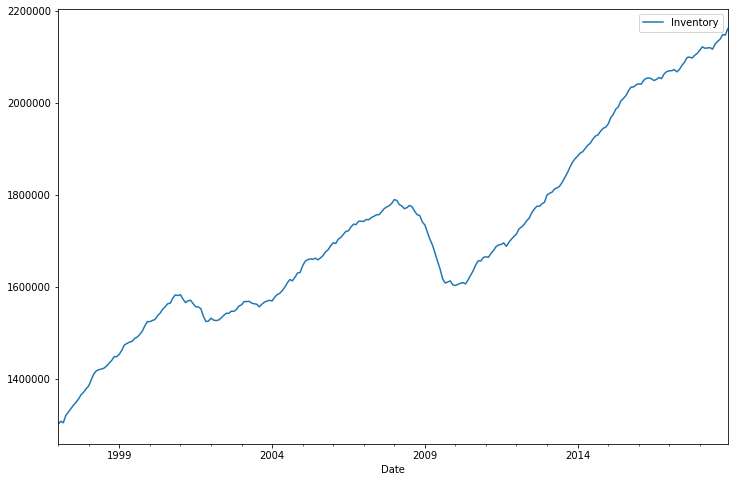

In [112]:
df2.plot(figsize = (12,8))

In [113]:
adf_test(df2['Inventory'])

Augmented Dickey-fuller test: 
adf test stats           -0.101142
p-value                   0.949325
# of lags                 5.000000
# of observations       258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Failed to reject Null Hypothesis! Time Series is not stationary!


In [114]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [115]:
result = seasonal_decompose(df2['Inventory'], model='add')

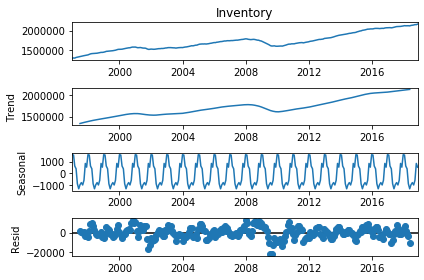

In [116]:
result.plot();

In [117]:
# We can see that our data has seasonal component, so we can run SARIMA model as well.

# But, for now lets first implement ARIMA model assuming that the magnitude of seasonal component is too small and can be ignored!

In [118]:
from pmdarima import auto_arima

In [119]:
auto_arima(df2['Inventory'], seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=5371.982, BIC=5393.415, Time=0.548 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5345.497, BIC=5352.641, Time=0.016 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5398.340, BIC=5409.056, Time=0.047 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5347.635, BIC=5358.351, Time=0.053 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=5407.713, BIC=5411.285, Time=0.000 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5377.052, BIC=5391.340, Time=0.249 seconds
Total fit time: 0.917 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2670.748
Date:                Wed, 19 Feb 2020   AIC                           5345.497
Time:                        20:11:53   BIC                           5352.641
Sample:                             0   HQIC                          5348.368
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3272.5171    472.729      6.923      0.000    2345.985    4199.050
sigma2      3.873e+07   2.92e+06     13.263      0.000     3.3e+07    4.44e+07
===================================================================================
Ljung-Box (Q):                      461.88   Jarque-Bera (JB):               107.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.18
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
from statsmodels.tsa.statespace.tools import diff

In [121]:
df2['Diff_1'] = diff(df2['Inventory'], k_diff=1)

In [122]:
df2.head()

,Inventory,Diff_1
Date,,
1997-01-01,1301161,NaN
1997-02-01,1307080,5919.0
1997-03-01,1303978,-3102.0
1997-04-01,1319740,15762.0
1997-05-01,1327294,7554.0


In [123]:
adf_test(df2['Diff_1'])

Augmented Dickey-fuller test: 
adf test stats           -3.426619
p-value                   0.010084
# of lags                 4.000000
# of observations       258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Null Hypothesis rejected! Time series is stationary!


## Lets also check manually how we can tell p,d,q values using PACF and ACF plots:

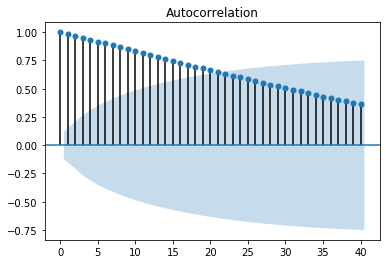

In [124]:
plot_acf(df2['Inventory'], lags=40);

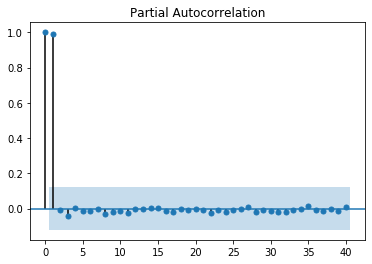

In [125]:
plot_pacf(df2['Inventory'],lags=40);

In [126]:
stepwise_fit = auto_arima(df2['Inventory'], start_p=0, start_q=0,max_p=2
                         ,max_q=2, seasonal=False, trace=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5345.497, BIC=5352.641, Time=0.020 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=5398.340, BIC=5409.056, Time=0.072 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5347.635, BIC=5358.351, Time=0.068 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=5407.713, BIC=5411.285, Time=0.008 seconds
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=5377.052, BIC=5391.340, Time=0.227 seconds
Total fit time: 0.402 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2670.748
Date:                Wed, 19 Feb 2020   AIC                           5345.497
Time:                        20:12:00   BIC                           5352.641
Sample:                             0   HQIC                          5348.368
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3272.5171    472.729      6.923      0.000    2345.985    4199.050
sigma2      3.873e+07   2.92e+06     13.263      0.000     3.3e+07    4.44e+07
===================================================================================
Ljung-Box (Q):                      461.88   Jarque-Bera (JB):               107.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -1.18
Prob(H) (two-sided):                  0.35   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [127]:
len(df2)

264

In [128]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [129]:
df2 = df2.astype('float64')

In [130]:
# df2.dtypes

### IMPORTANT TIP:

In [168]:
#### It is suggested to play around with different values of (p,d,q) here, to check which one is giving the least AIC score!

In [162]:
import statsmodels as sm

model = sm.tsa.arima_model.ARIMA(train['Inventory'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Inventory   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.076
Method:                       css-mle   S.D. of innovations           4838.888
Date:                Wed, 19 Feb 2020   AIC                           4980.153
Time:                        20:20:58   BIC                           4994.255
Sample:                    02-01-1997   HQIC                          4985.828
                         - 12-01-2017                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3281.7305   1340.437      2.448      0.014     654.522    5908.939
ar.L1.D.Inventory     0.9016      0.039     22.836      0.000       0.824       0.979
ma.L1.D.Inventory    -0.5547      0.080     -6.969      0.000      -0.711      -0.399
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1092           +0.0000j            1.1092            0.0000
MA.1            1.8026           +0.0000j            1.8026            0.0000
-----------------------------------------------------------------------------
"""

In [169]:
start = len(train)
end = len(train) + len(test) -1


predictions = results.predict(start = start, end = end, typ='levels').rename('Predicted ARIMA(1,1,1)')
# typ = 'linear' (i.e. by default gives us predictions in terms of differenced endogeneous variables)
# whereas, typ = 'levels' predicts level of original endogeneous variables.

In [164]:
predictions

2018-01-01    2.111716e+06
2018-02-01    2.115378e+06
2018-03-01    2.119002e+06
2018-04-01    2.122593e+06
2018-05-01    2.126153e+06
2018-06-01    2.129686e+06
2018-07-01    2.133194e+06
2018-08-01    2.136679e+06
2018-09-01    2.140145e+06
2018-10-01    2.143593e+06
2018-11-01    2.147024e+06
2018-12-01    2.150441e+06
Freq: MS, Name: Predicted ARIMA(1,1,1), dtype: float64

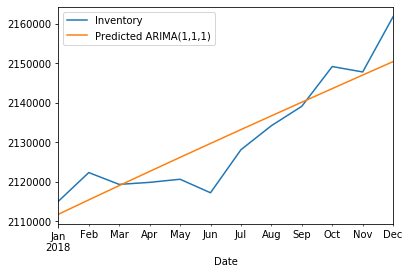

In [165]:
#train['Inventory'].plot(figsize=(12,8), legend=True)
test['Inventory'].plot(legend=True)
predictions.plot(legend=True)

In [166]:
from sklearn.metrics import mean_squared_error

In [167]:
import numpy as np
rmse = np.sqrt(mean_squared_error(test['Inventory'], predictions))
rmse

6115.390518090231

In [172]:
# We can compare the average values of test set and predicted values also, to check how off we are:

In [170]:
predictions.mean()

2131300.2512028967

In [171]:
test['Inventory'].mean()

2131201.25

### To forecast into the unknown future using the simple ARIMA model:

In [173]:
# Considering full dataset:

model = ARIMA(df2['Inventory'], order=(1,1,1))

In [174]:
result = model.fit()

In [178]:
forecast = result.predict(start=len(df2), end=len(df2)+11, typ='levels').rename("ARIMA(1,1,1) future forecasts")

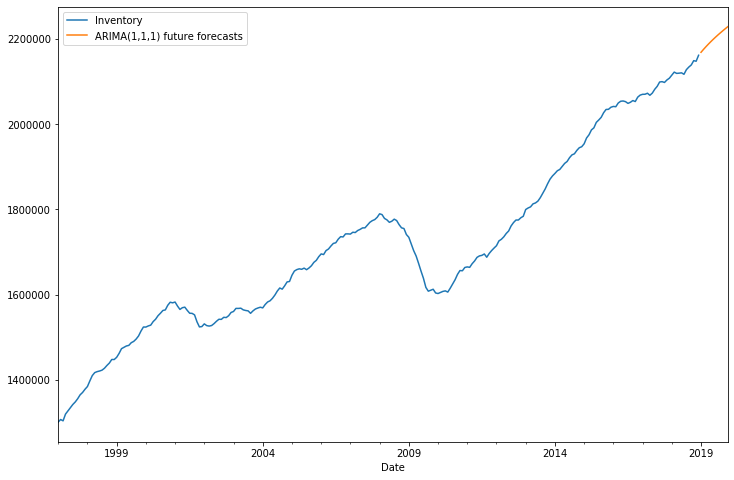

In [179]:
df2['Inventory'].plot(figsize=(12,8), legend=True)
forecast.plot(legend=True)

### So, till now we have performed forecast using basic ARIMA model with order of (1,1,1)